In [85]:
import nltk
import numpy as np
import re
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt
import tweepy
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import itertools
import collections

from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot

#plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

import datashader as ds
import datashader.transfer_functions as tf

In [86]:
# Deklarasi API key
consumer_key = "02k50KSvRlwffLHcvTPJ4cE0z"
consumer_secret = "hfr89KezCJ16yStqZFoEsBpniAY3F4T53QtHcyCFyiNVS4hsMF"
access_token = "864053449318555648-6kagfajcc2Eo0MCzWamEneACm2uwP7b"
access_token_secret = "sSqxCG5ReOwxdgtKLOAAu4cSZhW5e9gpUYjFitolHx5kx"

In [87]:
# authorization
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [88]:
# Pengambilan data dari twitter dengan subtopik Scientist Protest
tweets = [] 
all_polarity = 0
for tweet in tweepy.Cursor(method=api.search_tweets, q="Scientist protest -filter:retweets", tweet_mode='extended').items(1000):
    tweets.append((tweet.created_at, tweet.full_text, tweet.retweet_count, tweet.favorite_count, tweet.user.screen_name, tweet.lang))     
    scientist_protest_df=pd.DataFrame(tweets, columns=["Tanggal Tweet","Tweet Text","Jumlah Retweet","Jumlah Likes", "Username", "Language"])

In [89]:
# Pengambilan data dari twitter dengan subtopik Global Warming
tweets = [] 
all_polarity = 0
for tweet in tweepy.Cursor(method=api.search_tweets, q="Global warming -filter:retweets", tweet_mode='extended').items(1000):
    tweets.append((tweet.created_at, tweet.full_text, tweet.retweet_count, tweet.favorite_count, tweet.user.screen_name, tweet.lang))     
    global_warming_df=pd.DataFrame(tweets, columns=["Tanggal Tweet","Tweet Text","Jumlah Retweet","Jumlah Likes", "Username", "Language"])

In [90]:
# Pengambilan data dari twitter dengan subtopik Air Pollution
tweets = [] 
all_polarity = 0
for tweet in tweepy.Cursor(method=api.search_tweets, q="Air pollution -filter:retweets", tweet_mode='extended').items(1000):
    tweets.append((tweet.created_at, tweet.full_text, tweet.retweet_count, tweet.favorite_count, tweet.user.screen_name, tweet.lang))     
    air_pollution_df=pd.DataFrame(tweets, columns=["Tanggal Tweet","Tweet Text","Jumlah Retweet","Jumlah Likes", "Username", "Language"])

In [91]:
# Pengambilan data dari twitter dengan subtopik Reforestation
tweets = [] 
all_polarity = 0
for tweet in tweepy.Cursor(method=api.search_tweets, q="Reforestation -filter:retweets", tweet_mode='extended').items(1000):
    tweets.append((tweet.created_at, tweet.full_text, tweet.retweet_count, tweet.favorite_count, tweet.user.screen_name, tweet.lang))     
    reforestation_df=pd.DataFrame(tweets, columns=["Tanggal Tweet","Tweet Text","Jumlah Retweet","Jumlah Likes", "Username", "Language"])

In [92]:
# Pengambilan data dari twitter dengan subtopik Deleting Email
tweets = [] 
all_polarity = 0
for tweet in tweepy.Cursor(method=api.search_tweets, q="Deleting email -filter:retweets", tweet_mode='extended').items(1000):
    tweets.append((tweet.created_at, tweet.full_text, tweet.retweet_count, tweet.favorite_count, tweet.user.screen_name, tweet.lang))     
    deleting_email_df=pd.DataFrame(tweets, columns=["Tanggal Tweet","Tweet Text","Jumlah Retweet","Jumlah Likes", "Username", "Language"])

In [93]:
# Number of unique tweets

# Subtopik Scientist Protest
sp_unique_text = scientist_protest_df["Tweet Text"].unique()
print(len(sp_unique_text))
# Subtopik Global Warming
gw_unique_text = global_warming_df["Tweet Text"].unique()
print(len(gw_unique_text))
# Subtopik Air Pollution
ap_unique_text = air_pollution_df["Tweet Text"].unique()
print(len(ap_unique_text))
# Subtopik Reforestation
reforest_unique_text = reforestation_df["Tweet Text"].unique()
print(len(reforest_unique_text))
# Subtopik Deleting Email
de_unique_text = deleting_email_df["Tweet Text"].unique()
print(len(de_unique_text))

164
998
27
379
256


In [94]:
# Number of unique users

# Subtopik Scientist Protest
sp_unique_user = scientist_protest_df["Username"].unique()
print(len(sp_unique_user))
# Subtopik Global Warming
gw_unique_user = global_warming_df["Username"].unique()
print(len(gw_unique_user))
# Subtopik Air Pollution
ap_unique_user = air_pollution_df["Username"].unique()
print(len(ap_unique_user))
# Subtopik Reforestation
reforest_unique_user = reforestation_df["Username"].unique()
print(len(reforest_unique_user))
# Subtopik Deleting Email
de_unique_user = deleting_email_df["Username"].unique()
print(len(de_unique_user))

158
895
27
289
209


In [95]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [96]:
scientist_protest_df['Clean_text'] = np.vectorize(remove_pattern)(scientist_protest_df["Tweet Text"], "@[\w]*")
global_warming_df['Clean_text'] = np.vectorize(remove_pattern)(global_warming_df["Tweet Text"], "@[\w]*")
air_pollution_df['Clean_text'] = np.vectorize(remove_pattern)(air_pollution_df["Tweet Text"], "@[\w]*")
reforestation_df['Clean_text'] = np.vectorize(remove_pattern)(reforestation_df["Tweet Text"], "@[\w]*")
deleting_email_df['Clean_text'] = np.vectorize(remove_pattern)(deleting_email_df["Tweet Text"], "@[\w]*")

In [97]:
# remove special characters, numbers, punctuations
scientist_protest_df['Clean_text'] = scientist_protest_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
global_warming_df['Clean_text'] = global_warming_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
air_pollution_df['Clean_text'] = air_pollution_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
reforestation_df['Clean_text'] = reforestation_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
deleting_email_df['Clean_text'] = deleting_email_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")

C:\Users\ihzaf\AppData\Local\Temp\ipykernel_29164\1362360135.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  scientist_protest_df['Clean_text'] = scientist_protest_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
C:\Users\ihzaf\AppData\Local\Temp\ipykernel_29164\1362360135.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  global_warming_df['Clean_text'] = global_warming_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
C:\Users\ihzaf\AppData\Local\Temp\ipykernel_29164\1362360135.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  air_pollution_df['Clean_text'] = air_pollution_df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
C:\Users\ihzaf\AppData\Local\Temp\ipykernel_29164\1362360135.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  reforestation_df['Clean_text'] = reforestation_df['Cl

In [98]:
scientist_protest_df['Clean_text'] = scientist_protest_df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
global_warming_df['Clean_text'] = global_warming_df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
air_pollution_df['Clean_text'] = air_pollution_df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
reforestation_df['Clean_text'] = reforestation_df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
deleting_email_df['Clean_text'] = deleting_email_df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [99]:
tokenized_tweet_sp = scientist_protest_df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet_gw = global_warming_df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet_ap = air_pollution_df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet_reforest = reforestation_df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet_de = deleting_email_df['Clean_text'].apply(lambda x: x.split())

In [100]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet_sp = tokenized_tweet_sp.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_sp.head()
tokenized_tweet_gw = tokenized_tweet_gw.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_gw.head()
tokenized_tweet_ap = tokenized_tweet_ap.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_ap.head()
tokenized_tweet_reforest = tokenized_tweet_reforest.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_reforest.head()
tokenized_tweet_de = tokenized_tweet_de.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_de.head()

0    [fifti, five, pleas, remov, from, thi, email, ...
1    [yesterday, watch, elderli, check, email, spen...
2    [have, close, down, email, account, chang, acc...
3    [wonder, storag, free, despit, delet, stuff, a...
4    [they, have, catch, delet, even, just, email, ...
Name: Clean_text, dtype: object

In [101]:
for i in range(len(tokenized_tweet_sp)):
    tokenized_tweet_sp[i] = ' '.join(tokenized_tweet_sp[i])

scientist_protest_df['Clean_text'] = tokenized_tweet_sp

for i in range(len(tokenized_tweet_gw)):
    tokenized_tweet_gw[i] = ' '.join(tokenized_tweet_gw[i])

global_warming_df['Clean_text'] = tokenized_tweet_gw

for i in range(len(tokenized_tweet_ap)):
    tokenized_tweet_ap[i] = ' '.join(tokenized_tweet_ap[i])

air_pollution_df['Clean_text'] = tokenized_tweet_ap

for i in range(len(tokenized_tweet_reforest)):
    tokenized_tweet_reforest[i] = ' '.join(tokenized_tweet_reforest[i])

reforestation_df['Clean_text'] = tokenized_tweet_reforest

for i in range(len(tokenized_tweet_de)):
    tokenized_tweet_de[i] = ' '.join(tokenized_tweet_de[i])

deleting_email_df['Clean_text'] = tokenized_tweet_de

In [102]:
scientist_protest_df.loc[:,('Tweet Text','Clean_text')]
global_warming_df.loc[:,('Tweet Text','Clean_text')]
air_pollution_df.loc[:,('Tweet Text','Clean_text')]
reforestation_df.loc[:,('Tweet Text','Clean_text')]
deleting_email_df.loc[:,('Tweet Text','Clean_text')]

,Tweet Text,Clean_text
0,@crepusculi @KirkGeohegan @jamtodTwit @FatherS...,fifti five pleas remov from thi email chain re...
1,Yesterday I watched my elderly dad checking hi...,yesterday watch elderli check email spend soli...
2,"I have closed down the email account, changed ...",have close down email account chang account ov...
3,me wondering why my storage won’t free up desp...,wonder storag free despit delet stuff also ema...
4,@MackeyLee55 @duty2warn And all they have to d...,they have catch delet even just email they hav...
...,...,...
251,@sharon_winkey Call the office on the landline...,call offic landlin request speak then dumb req...
252,"@1bullet1kill1 Btw, for your privacy, we recom...",your privaci recommend delet your tweet that y...
253,@SheikhJulfekar Mind sharing your channel's UR...,mind share your channel more context what miss...
254,@NaikHiranya It's best to wait for your verifi...,best wait your verif process complet check you...


In [103]:
scientist_protest_df[scientist_protest_df["Tweet Text"].isnull()]
global_warming_df[global_warming_df["Tweet Text"].isnull()]
air_pollution_df[air_pollution_df["Tweet Text"].isnull()]
reforestation_df[reforestation_df["Tweet Text"].isnull()]
deleting_email_df[deleting_email_df["Tweet Text"].isnull()]

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text


In [104]:
scientist_protest_df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)
global_warming_df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)
air_pollution_df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)
reforestation_df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)
deleting_email_df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)

In [105]:
scientist_protest_df.reset_index(drop=True,inplace=True)
global_warming_df.reset_index(drop=True,inplace=True)
air_pollution_df.reset_index(drop=True,inplace=True)
reforestation_df.reset_index(drop=True,inplace=True)
deleting_email_df.reset_index(drop=True,inplace=True)

In [106]:
scientist_protest_df['Clean_text_length'] = scientist_protest_df['Clean_text'].apply(len)
scientist_protest_df.head()
global_warming_df['Clean_text_length'] = global_warming_df['Clean_text'].apply(len)
global_warming_df.head()
air_pollution_df['Clean_text_length'] = air_pollution_df['Clean_text'].apply(len)
air_pollution_df.head()
reforestation_df['Clean_text_length'] = reforestation_df['Clean_text'].apply(len)
reforestation_df.head()
deleting_email_df['Clean_text_length'] = deleting_email_df['Clean_text'].apply(len)
deleting_email_df.head()

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text,Clean_text_length
0,2022-05-31 13:25:28+00:00,@crepusculi @KirkGeohegan @jamtodTwit @FatherS...,0,1,tpwallisch,en,fifti five pleas remov from thi email chain re...,121
1,2022-05-31 12:54:01+00:00,Yesterday I watched my elderly dad checking hi...,0,2,hbhanoo,en,yesterday watch elderli check email spend soli...,155
2,2022-05-31 12:52:26+00:00,"I have closed down the email account, changed ...",1,1,murderandmore,en,have close down email account chang account ov...,131
3,2022-05-31 12:35:39+00:00,me wondering why my storage won’t free up desp...,0,5,kvzuhas_,en,wonder storag free despit delet stuff also ema...,58
4,2022-05-31 11:58:20+00:00,@MackeyLee55 @duty2warn And all they have to d...,0,3,Hyporeality1,en,they have catch delet even just email they hav...,75


In [107]:
scientist_protest_df[scientist_protest_df['Clean_text_length']==0]['Clean_text'] 
list_sp = scientist_protest_df[scientist_protest_df['Clean_text_length']==0]['Clean_text'].index
list_sp

global_warming_df[global_warming_df['Clean_text_length']==0]['Clean_text'] 
list_gw = global_warming_df[global_warming_df['Clean_text_length']==0]['Clean_text'].index
list_gw

air_pollution_df[air_pollution_df['Clean_text_length']==0]['Clean_text'] 
list_ap = air_pollution_df[air_pollution_df['Clean_text_length']==0]['Clean_text'].index
list_ap

reforestation_df[reforestation_df['Clean_text_length']==0]['Clean_text'] 
list_reforest = reforestation_df[reforestation_df['Clean_text_length']==0]['Clean_text'].index
list_reforest

deleting_email_df[deleting_email_df['Clean_text_length']==0]['Clean_text'] 
list_de = deleting_email_df[deleting_email_df['Clean_text_length']==0]['Clean_text'].index
list_de

Int64Index([], dtype='int64')

In [108]:
scientist_protest_df.drop(index = list_sp,inplace=True)
global_warming_df.drop(index = list_gw,inplace=True)
air_pollution_df.drop(index = list_ap,inplace=True)
reforestation_df.drop(index = list_reforest,inplace=True)
deleting_email_df.drop(index = list_de,inplace=True)

In [109]:
scientist_protest_df.info()
global_warming_df.info()
air_pollution_df.info()
reforestation_df.info()
deleting_email_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Tanggal Tweet      162 non-null    datetime64[ns, UTC]
 1   Tweet Text         162 non-null    object             
 2   Jumlah Retweet     162 non-null    int64              
 3   Jumlah Likes       162 non-null    int64              
 4   Username           162 non-null    object             
 5   Language           162 non-null    object             
 6   Clean_text         162 non-null    object             
 7   Clean_text_length  162 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 10.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----            

In [110]:
scientist_protest_df.reset_index(drop=True,inplace=True)
scientist_protest_df.info()
global_warming_df.reset_index(drop=True,inplace=True)
global_warming_df.info()
air_pollution_df.reset_index(drop=True,inplace=True)
air_pollution_df.info()
reforestation_df.reset_index(drop=True,inplace=True)
reforestation_df.info()
deleting_email_df.reset_index(drop=True,inplace=True)
deleting_email_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Tanggal Tweet      162 non-null    datetime64[ns, UTC]
 1   Tweet Text         162 non-null    object             
 2   Jumlah Retweet     162 non-null    int64              
 3   Jumlah Likes       162 non-null    int64              
 4   Username           162 non-null    object             
 5   Language           162 non-null    object             
 6   Clean_text         162 non-null    object             
 7   Clean_text_length  162 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 10.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----            

In [111]:
from textblob import TextBlob

In [112]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [113]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [114]:
# Scientist Protest Sentiment Analysis
scientist_protest_df['sentiment']=scientist_protest_df.Clean_text.apply(calculate_sentiment)
scientist_protest_df['sentiment_analyser']=scientist_protest_df.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(scientist_protest_df)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(scientist_protest_df)): 
  s['compound_score'][i] = scientist_protest_df['sentiment_analyser'][i]['compound']
  
  if (scientist_protest_df['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (scientist_protest_df['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((scientist_protest_df['sentiment_analyser'][i]['compound'] >= -0.05) & (scientist_protest_df['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
scientist_protest_df['compound_score'] = s['compound_score']
scientist_protest_df['compound_score_sentiment'] = s['compound_score_sentiment']
scientist_protest_df.head(4)

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,2022-05-31 11:36:56+00:00,“The fossil fuel industry has deeply penetrate...,1,0,MartenRobert,en,fossil fuel industri deepli penetr polit even ...,121,"(0.025, 0.05)","{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.3182,Negative
1,2022-05-31 04:24:11+00:00,"@TalatHussain12 Mr. Scientist, can you please ...",0,0,iqbal_akhtar,en,scientist pleas enlighten protest which right ...,73,"(-0.29464285714285715, 0.7678571428571428)","{'neg': 0.372, 'neu': 0.427, 'pos': 0.201, 'co...",-0.4215,Negative
2,2022-05-31 00:26:48+00:00,Entrevistas duras y deprimentes de leer y está...,0,0,camilobarriost,en,entrevista dura depriment leer peter kalmu cie...,176,"(0.39285714285714285, 0.5178571428571428)","{'neg': 0.134, 'neu': 0.866, 'pos': 0.0, 'comp...",-0.6326,Negative
3,2022-05-30 21:11:42+00:00,https://t.co/5XauxbWCeW,0,1,SigurdHole,und,http xauxbwcew,14,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [115]:
#Pengolahan data polaritas sentiment scientist protest
sent_positive = 0
sent_negative = 0
sent_neutral = 0
for i in range(len(scientist_protest_df)):
    if scientist_protest_df["compound_score_sentiment"][i] == "Positive":
        sent_positive+=1
    elif scientist_protest_df["compound_score_sentiment"][i] == "Negative":
        sent_negative+=1
    elif scientist_protest_df["compound_score_sentiment"][i] == "Neutral":
        sent_neutral+=1
        
SentDF = []
SentDF.append(sent_positive)
SentDF.append(sent_negative)
SentDF.append(sent_neutral)
print(SentDF)

[28, 47, 87]


<AxesSubplot:ylabel='Sentiment'>

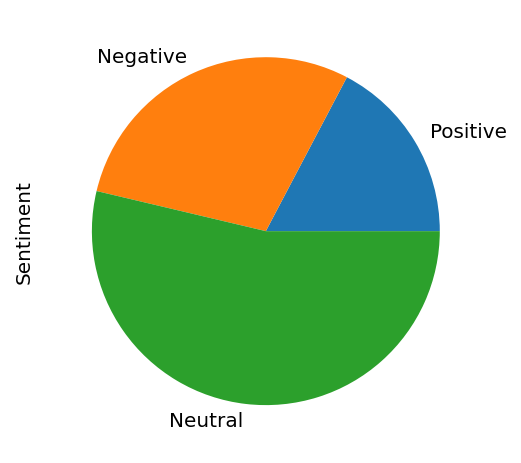

In [116]:
#Visualisasi Polaritas Sentiment Scientist Protest
temp = pd.DataFrame({"Sentiment":SentDF}, index=["Positive", "Negative", "Neutral"])
temp['Sentiment'].plot(kind="pie" )

In [117]:
# Global Warming Sentiment Analysis
global_warming_df['sentiment']=global_warming_df.Clean_text.apply(calculate_sentiment)
global_warming_df['sentiment_analyser']=global_warming_df.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(global_warming_df)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(global_warming_df)): 
  s['compound_score'][i] = global_warming_df['sentiment_analyser'][i]['compound']
  
  if (global_warming_df['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (global_warming_df['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((global_warming_df['sentiment_analyser'][i]['compound'] >= -0.05) & (global_warming_df['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
global_warming_df['compound_score'] = s['compound_score']
global_warming_df['compound_score_sentiment'] = s['compound_score_sentiment']
global_warming_df.head(4)

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,2022-05-31 13:34:33+00:00,Yeah we even started global warming and corona...,0,0,95_97tk,en,yeah even start global warm corona viru http x...,52,"(0.3, 0.3)","{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.4767,Positive
1,2022-05-31 13:34:18+00:00,@queenie_znlsl @BTS_twt global warming\n\nMy f...,0,0,bunny_chim1301,en,global warm favorit billboard trend song #with...,79,"(0.3, 0.3)","{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.2263,Positive
2,2022-05-31 13:34:10+00:00,@BrknMan @rextalman @MartinBrampton @JsharkJil...,0,0,F59Man,en,miss thi http egliz,19,"(0.0, 0.0)","{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp...",-0.1531,Negative
3,2022-05-31 13:34:05+00:00,@6ixbuzztv So 78 years ago was the previous re...,0,0,TypeToSnipe,en,year previou record that becaus global warm we...,58,"(0.19999999999999998, 0.19999999999999998)","{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.4588,Positive


In [118]:
#Pengolahan data polaritas sentiment global warming
sent_positive = 0
sent_negative = 0
sent_neutral = 0
for i in range(len(global_warming_df)):
    if global_warming_df["compound_score_sentiment"][i] == "Positive":
        sent_positive+=1
    elif global_warming_df["compound_score_sentiment"][i] == "Negative":
        sent_negative+=1
    elif global_warming_df["compound_score_sentiment"][i] == "Neutral":
        sent_neutral+=1
        
SentDF = []
SentDF.append(sent_positive)
SentDF.append(sent_negative)
SentDF.append(sent_neutral)
print(SentDF)

[610, 275, 65]


<AxesSubplot:ylabel='Sentiment'>

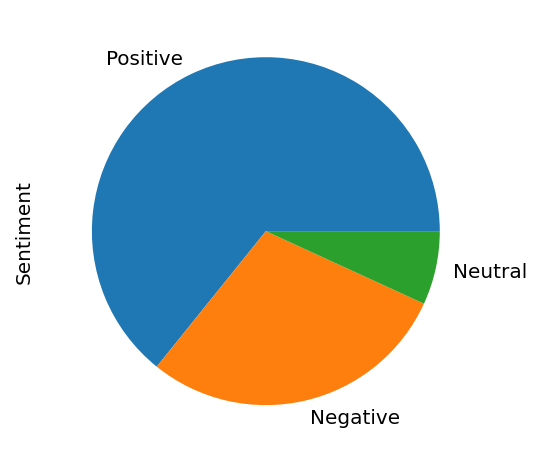

In [119]:
#Visualisasi Polaritas Sentiment Global Warming
temp = pd.DataFrame({"Sentiment":SentDF}, index=["Positive", "Negative", "Neutral"])
temp['Sentiment'].plot(kind="pie" )

In [120]:
# Air Pollution Sentiment Analysis
air_pollution_df['sentiment']=air_pollution_df.Clean_text.apply(calculate_sentiment)
air_pollution_df['sentiment_analyser']=air_pollution_df.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(air_pollution_df)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(air_pollution_df)): 
  s['compound_score'][i] = air_pollution_df['sentiment_analyser'][i]['compound']
  
  if (air_pollution_df['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (air_pollution_df['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((air_pollution_df['sentiment_analyser'][i]['compound'] >= -0.05) & (air_pollution_df['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
air_pollution_df['compound_score'] = s['compound_score']
air_pollution_df['compound_score_sentiment'] = s['compound_score_sentiment']
air_pollution_df.head(4)

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,2022-05-31 13:34:52+00:00,https://t.co/HyOPli7azD\n\nMany social housing...,0,0,P03940098,en,http hyopli mani social hous tenant suffer pol...,179,"(0.15476190476190477, 0.42559523809523814)","{'neg': 0.306, 'neu': 0.55, 'pos': 0.144, 'com...",-0.7783,Negative
1,2022-05-31 13:34:00+00:00,Or maybe it’s air pollution and adenovirus htt...,0,0,Szeal2,en,mayb pollut adenoviru http frmzplre,35,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,2022-05-31 13:31:53+00:00,1)I am not saying govt. is not doing anything ...,0,0,KrabhishekTwits,en,say govt do anyth rule follow corrupt thump ch...,131,"(1.3877787807814457e-17, 0.7000000000000001)","{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",0.7964,Positive
3,2022-05-31 13:31:51+00:00,@sacep_org exists @kdrarvind @a_khosla let's w...,0,0,ShaziaZRafi,en,exist work togeth with parliamentari group acr...,112,"(0.0, 0.0)","{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.3818,Positive


In [121]:
#Pengolahan data polaritas sentiment Air Pollution
sent_positive = 0
sent_negative = 0
sent_neutral = 0
for i in range(len(air_pollution_df)):
    if air_pollution_df["compound_score_sentiment"][i] == "Positive":
        sent_positive+=1
    elif air_pollution_df["compound_score_sentiment"][i] == "Negative":
        sent_negative+=1
    elif air_pollution_df["compound_score_sentiment"][i] == "Neutral":
        sent_neutral+=1
        
SentDF = []
SentDF.append(sent_positive)
SentDF.append(sent_negative)
SentDF.append(sent_neutral)
print(SentDF)

[7, 10, 10]


<AxesSubplot:ylabel='Sentiment'>

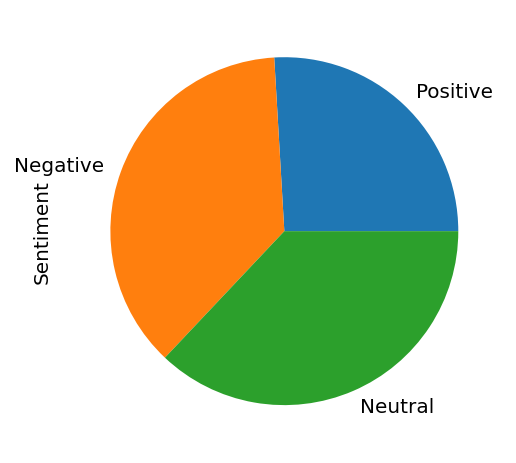

In [122]:
#Visualisasi Polaritas Sentiment Air Pollution
temp = pd.DataFrame({"Sentiment":SentDF}, index=["Positive", "Negative", "Neutral"])
temp['Sentiment'].plot(kind="pie" )

In [123]:
# Reforestation Sentiment Analysis
reforestation_df['sentiment']=reforestation_df.Clean_text.apply(calculate_sentiment)
reforestation_df['sentiment_analyser']=reforestation_df.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(reforestation_df)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(reforestation_df)): 
  s['compound_score'][i] = reforestation_df['sentiment_analyser'][i]['compound']
  
  if (reforestation_df['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (reforestation_df['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((reforestation_df['sentiment_analyser'][i]['compound'] >= -0.05) & (reforestation_df['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
reforestation_df['compound_score'] = s['compound_score']
reforestation_df['compound_score_sentiment'] = s['compound_score_sentiment']
reforestation_df.head(4)

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,2022-05-31 13:34:06+00:00,Despite the climate controversies swirling aro...,0,0,beverlytrees,en,despit climat controversi swirl around #nft nf...,195,"(0.0, 0.3333333333333333)","{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.9246,Positive
1,2022-05-31 13:33:12+00:00,CULTIVE OUTRA ÁRVORE!\nSua árvore será plantad...,0,0,mozneda,pt,cultiv outra rvore rvore plantada pela eden re...,111,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,2022-05-31 13:32:58+00:00,Certificado De Árvore\nSua árvore será a 37686...,0,0,mozneda,pt,certificado rvore rvore rvore plantada rvore p...,103,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
3,2022-05-31 13:30:02+00:00,Biochar 🪨\nCategory: Carbon removal; Long-live...,0,0,luneclimate,en,biochar categori carbon remov long live storag...,140,"(0.043181818181818175, 0.45)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [124]:
#Pengolahan data polaritas sentiment reforrestation
sent_positive = 0
sent_negative = 0
sent_neutral = 0
for i in range(len(reforestation_df)):
    if reforestation_df["compound_score_sentiment"][i] == "Positive":
        sent_positive+=1
    elif reforestation_df["compound_score_sentiment"][i] == "Negative":
        sent_negative+=1
    elif reforestation_df["compound_score_sentiment"][i] == "Neutral":
        sent_neutral+=1
        
SentDF = []
SentDF.append(sent_positive)
SentDF.append(sent_negative)
SentDF.append(sent_neutral)
print(SentDF)

[221, 45, 106]


<AxesSubplot:ylabel='Sentiment'>

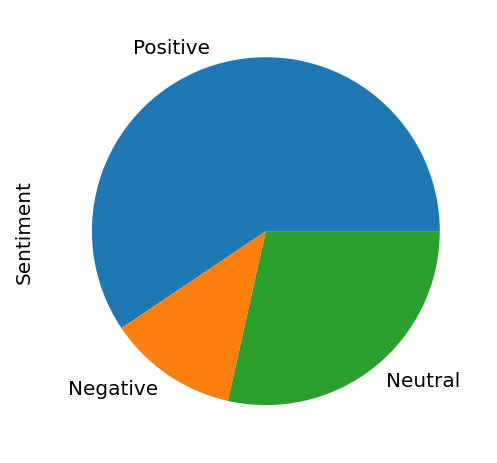

In [125]:
#Visualisasi Polaritas Sentiment Reforrestation
temp = pd.DataFrame({"Sentiment":SentDF}, index=["Positive", "Negative", "Neutral"])
temp['Sentiment'].plot(kind="pie" )

In [126]:
# Deleting Email Sentiment Analysis
deleting_email_df['sentiment']=deleting_email_df.Clean_text.apply(calculate_sentiment)
deleting_email_df['sentiment_analyser']=deleting_email_df.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(deleting_email_df)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(deleting_email_df)): 
  s['compound_score'][i] = deleting_email_df['sentiment_analyser'][i]['compound']
  
  if (deleting_email_df['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (deleting_email_df['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((deleting_email_df['sentiment_analyser'][i]['compound'] >= -0.05) & (deleting_email_df['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
deleting_email_df['compound_score'] = s['compound_score']
deleting_email_df['compound_score_sentiment'] = s['compound_score_sentiment']
deleting_email_df.head(4)

,Tanggal Tweet,Tweet Text,Jumlah Retweet,Jumlah Likes,Username,Language,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,2022-05-31 13:25:28+00:00,@crepusculi @KirkGeohegan @jamtodTwit @FatherS...,0,1,tpwallisch,en,fifti five pleas remov from thi email chain re...,121,"(0.75, 0.675)","{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.7906,Positive
1,2022-05-31 12:54:01+00:00,Yesterday I watched my elderly dad checking hi...,0,2,hbhanoo,en,yesterday watch elderli check email spend soli...,155,"(0.125, 0.21666666666666667)","{'neg': 0.107, 'neu': 0.733, 'pos': 0.16, 'com...",0.1531,Positive
2,2022-05-31 12:52:26+00:00,"I have closed down the email account, changed ...",1,1,murderandmore,en,have close down email account chang account ov...,131,"(-0.15555555555555559, 0.2888888888888889)","{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'comp...",0.0772,Positive
3,2022-05-31 12:35:39+00:00,me wondering why my storage won’t free up desp...,0,5,kvzuhas_,en,wonder storag free despit delet stuff also ema...,58,"(0.4, 0.8)","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.5106,Positive


In [127]:
#Pengolahan data polaritas sentiment Deleting Email
sent_positive = 0
sent_negative = 0
sent_neutral = 0
for i in range(len(deleting_email_df)):
    if deleting_email_df["compound_score_sentiment"][i] == "Positive":
        sent_positive+=1
    elif deleting_email_df["compound_score_sentiment"][i] == "Negative":
        sent_negative+=1
    elif deleting_email_df["compound_score_sentiment"][i] == "Neutral":
        sent_neutral+=1
        
SentDF = []
SentDF.append(sent_positive)
SentDF.append(sent_negative)
SentDF.append(sent_neutral)
print(SentDF)

[143, 41, 71]


<AxesSubplot:ylabel='Sentiment'>

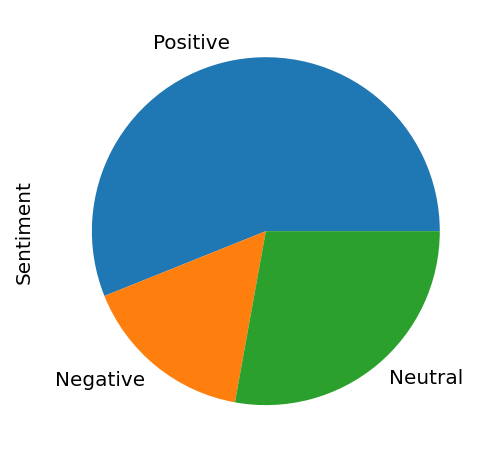

In [128]:
#Visualisasi Polaritas Sentiment Deleting Email
temp = pd.DataFrame({"Sentiment":SentDF}, index=["Positive", "Negative", "Neutral"])
temp['Sentiment'].plot(kind="pie" )

<AxesSubplot:ylabel='Kata-Kata'>

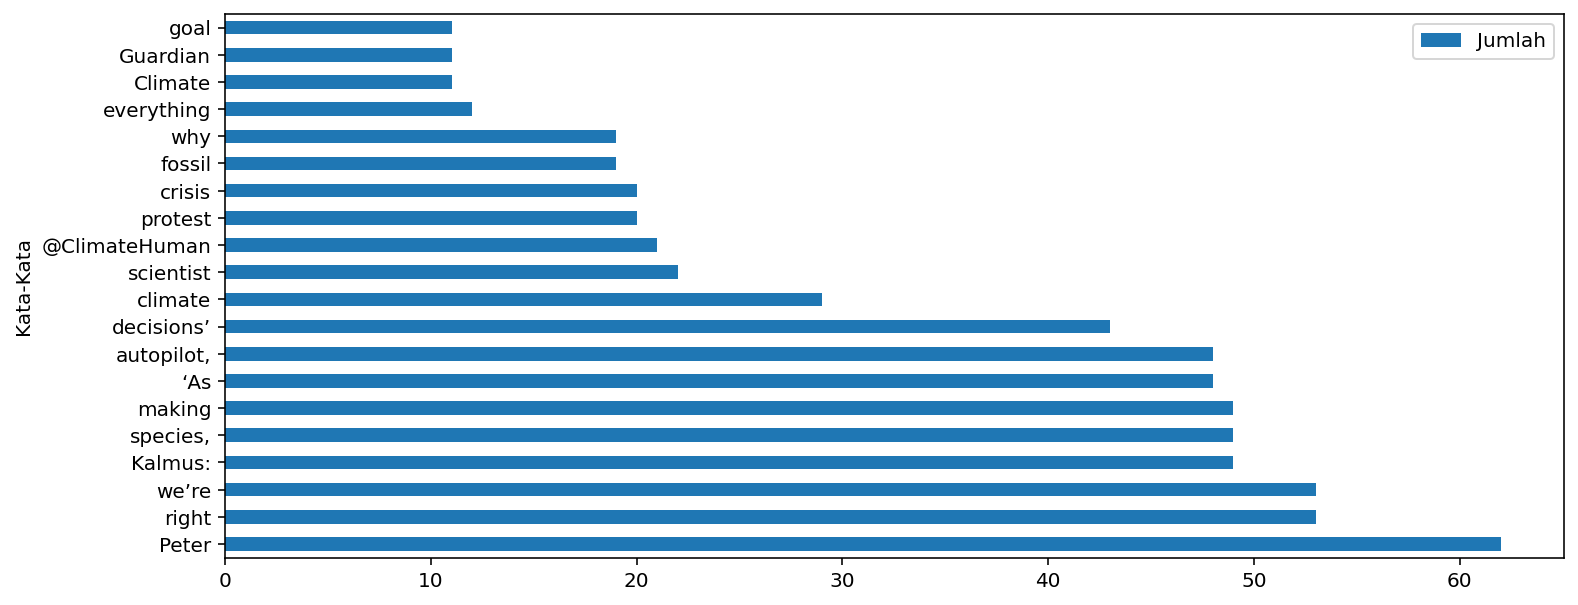

In [129]:
split_word= [tweet.split() for tweet in scientist_protest_df['Tweet Text']]
word = list(itertools.chain(*split_word))  
temp=[]
banned_words = ['the','not','are','and','The','that','this','you','i','to','a','of','in','for','on','with','is','was','as','at','be','by','it','have','from','but','his','they','her','she','or','an','will','my','one','all','would','there','their','what','so','up','out','if','about','who','get','which','go','me','when','make','can','like','time','no','just','him','know','take','people','into','year','your','good','some','could','them','see','other','than','then','now','look','only','come','its','over','think','also','back','after','use','two','how','our','work','first','well','way','even','new','want','because','any','these','give','day','most','us']
for i in range(len(word)):
    if len(word[i]) > 2:
        if word[i] not in banned_words:
            temp.append(word[i])

jumlah_kata = collections.Counter(temp)
xs=jumlah_kata.most_common(20)
kataKata = pd.DataFrame(xs, columns=["Kata-Kata", "Jumlah"])

kataKata = pd.DataFrame(kataKata, columns=["Kata-Kata","Jumlah"])
kataKata.plot.barh(x='Kata-Kata',y='Jumlah', figsize=(12,5))

<AxesSubplot:ylabel='Kata-Kata'>

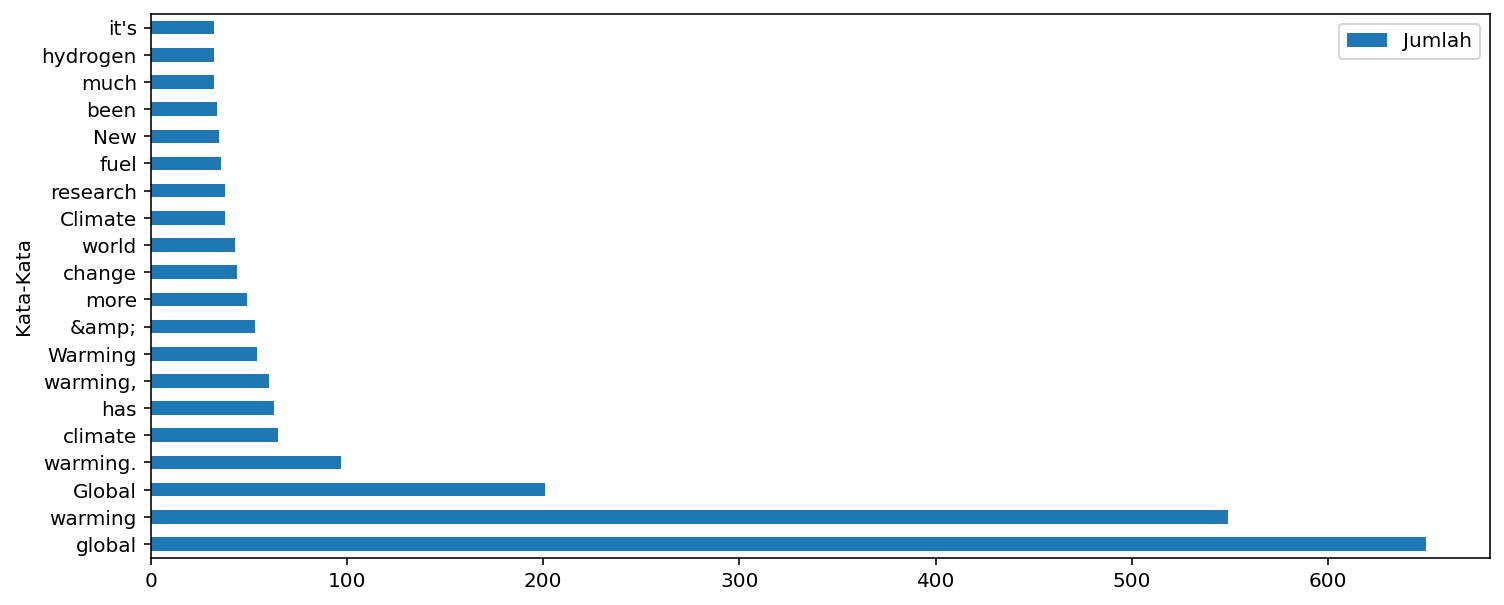

In [130]:
split_word= [tweet.split() for tweet in global_warming_df['Tweet Text']]
word = list(itertools.chain(*split_word))  
temp=[]
banned_words = ['the','not','are','and','The','that','this','you','i','to','a','of','in','for','on','with','is','was','as','at','be','by','it','have','from','but','his','they','her','she','or','an','will','my','one','all','would','there','their','what','so','up','out','if','about','who','get','which','go','me','when','make','can','like','time','no','just','him','know','take','people','into','year','your','good','some','could','them','see','other','than','then','now','look','only','come','its','over','think','also','back','after','use','two','how','our','work','first','well','way','even','new','want','because','any','these','give','day','most','us']
for i in range(len(word)):
    if len(word[i]) > 2:
        if word[i] not in banned_words:
            temp.append(word[i])

jumlah_kata = collections.Counter(temp)
xs=jumlah_kata.most_common(20)
kataKata = pd.DataFrame(xs, columns=["Kata-Kata", "Jumlah"])

kataKata = pd.DataFrame(kataKata, columns=["Kata-Kata","Jumlah"])
kataKata.plot.barh(x='Kata-Kata',y='Jumlah', figsize=(12,5))

<AxesSubplot:ylabel='Kata-Kata'>

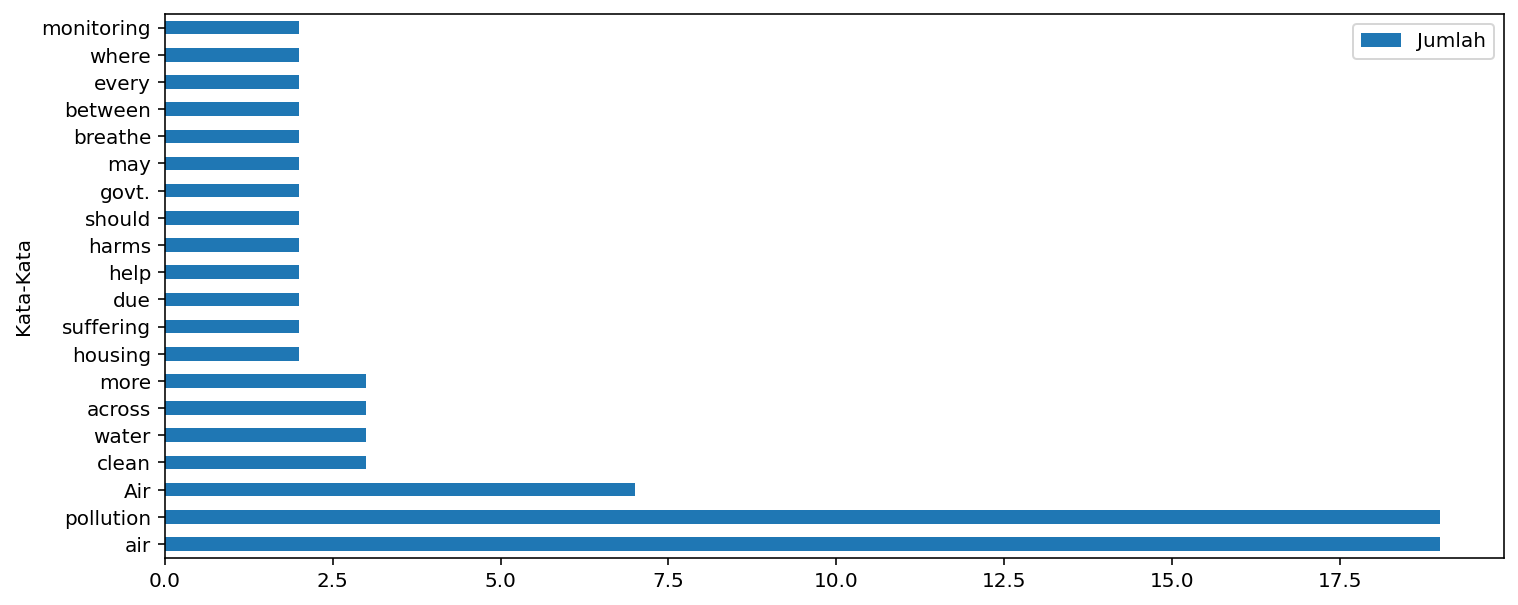

In [131]:
split_word= [tweet.split() for tweet in air_pollution_df['Tweet Text']]
word = list(itertools.chain(*split_word))  
temp=[]
banned_words = ['the','not','are','and','The','that','this','you','i','to','a','of','in','for','on','with','is','was','as','at','be','by','it','have','from','but','his','they','her','she','or','an','will','my','one','all','would','there','their','what','so','up','out','if','about','who','get','which','go','me','when','make','can','like','time','no','just','him','know','take','people','into','year','your','good','some','could','them','see','other','than','then','now','look','only','come','its','over','think','also','back','after','use','two','how','our','work','first','well','way','even','new','want','because','any','these','give','day','most','us']
for i in range(len(word)):
    if len(word[i]) > 2:
        if word[i] not in banned_words:
            temp.append(word[i])

jumlah_kata = collections.Counter(temp)
xs=jumlah_kata.most_common(20)
kataKata = pd.DataFrame(xs, columns=["Kata-Kata", "Jumlah"])

kataKata = pd.DataFrame(kataKata, columns=["Kata-Kata","Jumlah"])
kataKata.plot.barh(x='Kata-Kata',y='Jumlah', figsize=(12,5))

<AxesSubplot:ylabel='Kata-Kata'>

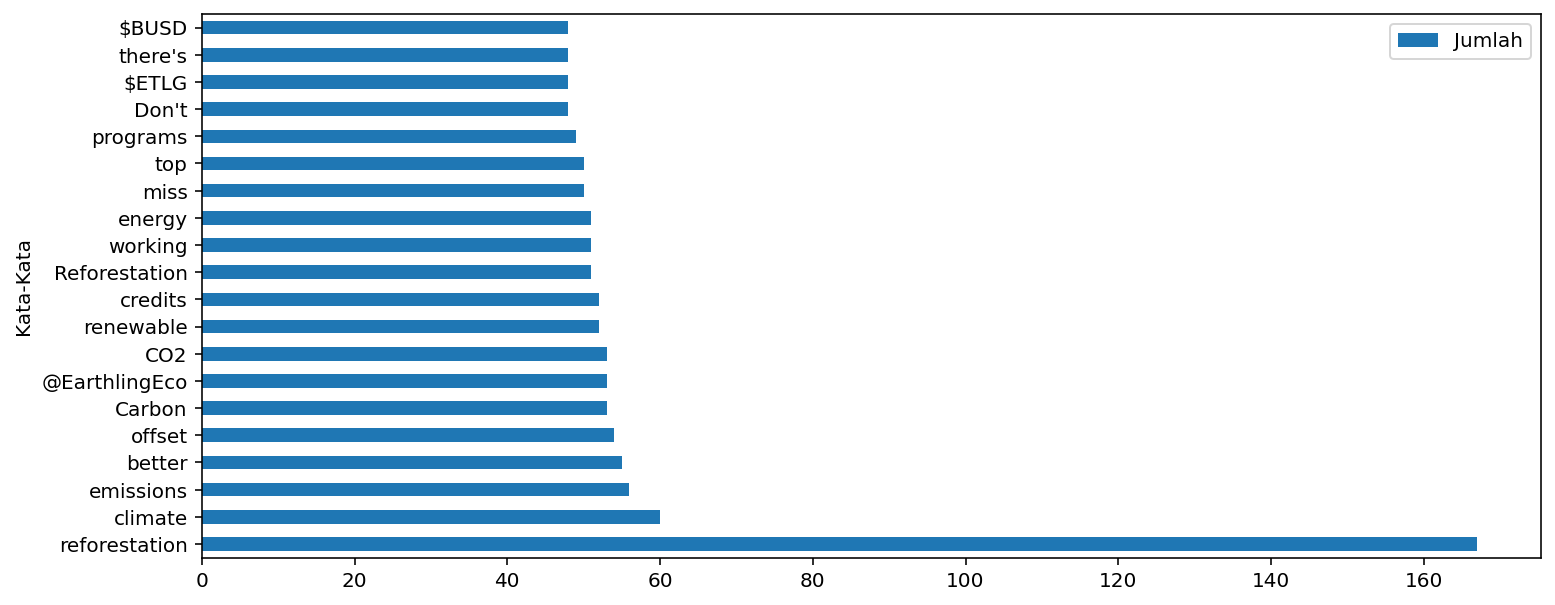

In [132]:
split_word= [tweet.split() for tweet in reforestation_df['Tweet Text']]
word = list(itertools.chain(*split_word))  
temp=[]
banned_words = ['the','not','are','and','The','that','this','you','i','to','a','of','in','for','on','with','is','was','as','at','be','by','it','have','from','but','his','they','her','she','or','an','will','my','one','all','would','there','their','what','so','up','out','if','about','who','get','which','go','me','when','make','can','like','time','no','just','him','know','take','people','into','year','your','good','some','could','them','see','other','than','then','now','look','only','come','its','over','think','also','back','after','use','two','how','our','work','first','well','way','even','new','want','because','any','these','give','day','most','us']
for i in range(len(word)):
    if len(word[i]) > 2:
        if word[i] not in banned_words:
            temp.append(word[i])

jumlah_kata = collections.Counter(temp)
xs=jumlah_kata.most_common(20)
kataKata = pd.DataFrame(xs, columns=["Kata-Kata", "Jumlah"])

kataKata = pd.DataFrame(kataKata, columns=["Kata-Kata","Jumlah"])
kataKata.plot.barh(x='Kata-Kata',y='Jumlah', figsize=(12,5))

<AxesSubplot:ylabel='Kata-Kata'>

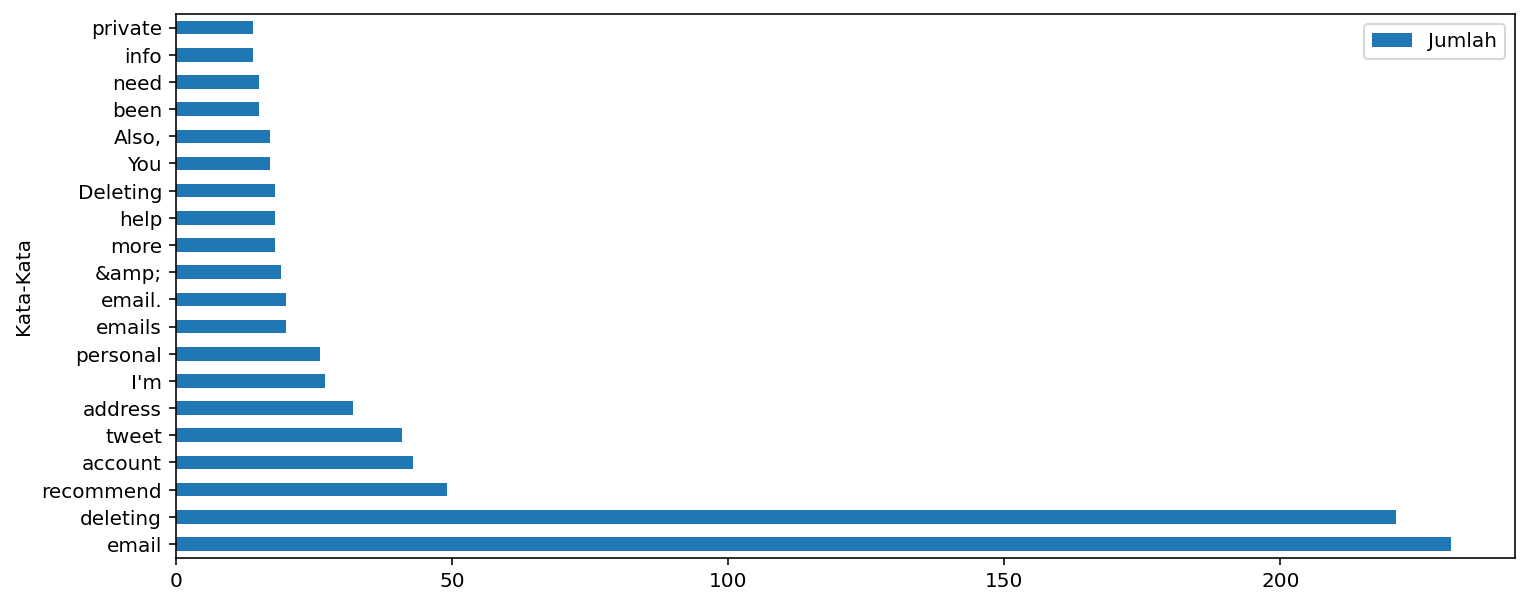

In [133]:
split_word= [tweet.split() for tweet in deleting_email_df['Tweet Text']]
word = list(itertools.chain(*split_word))  
temp=[]
banned_words = ['the','not','are','and','The','that','this','you','i','to','a','of','in','for','on','with','is','was','as','at','be','by','it','have','from','but','his','they','her','she','or','an','will','my','one','all','would','there','their','what','so','up','out','if','about','who','get','which','go','me','when','make','can','like','time','no','just','him','know','take','people','into','year','your','good','some','could','them','see','other','than','then','now','look','only','come','its','over','think','also','back','after','use','two','how','our','work','first','well','way','even','new','want','because','any','these','give','day','most','us']
for i in range(len(word)):
    if len(word[i]) > 2:
        if word[i] not in banned_words:
            temp.append(word[i])

jumlah_kata = collections.Counter(temp)
xs=jumlah_kata.most_common(20)
kataKata = pd.DataFrame(xs, columns=["Kata-Kata", "Jumlah"])

kataKata = pd.DataFrame(kataKata, columns=["Kata-Kata","Jumlah"])
kataKata.plot.barh(x='Kata-Kata',y='Jumlah', figsize=(12,5))

In [134]:
#Pengolahan data jumlah post per harinya
listdate = scientist_protest_df['Tanggal Tweet'].dt.date.tolist()
days=0
PostADay = []
ListOfDate = []
for i in range(len(listdate)):
    if i==0:
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    elif current == listdate[i]:
        days+=1
    elif not current == listdate[i]:
        PostADay.append(days)
        days=0
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    if i==len(listdate)-1:
        PostADay.append(days)

TaP = {"Tanggal":[], "Jumlah Post":[]};
for i in range(len(PostADay)):
    TaP["Tanggal"].append(ListOfDate[i])
    TaP["Jumlah Post"].append(PostADay[i])

<AxesSubplot:xlabel='Tanggal'>

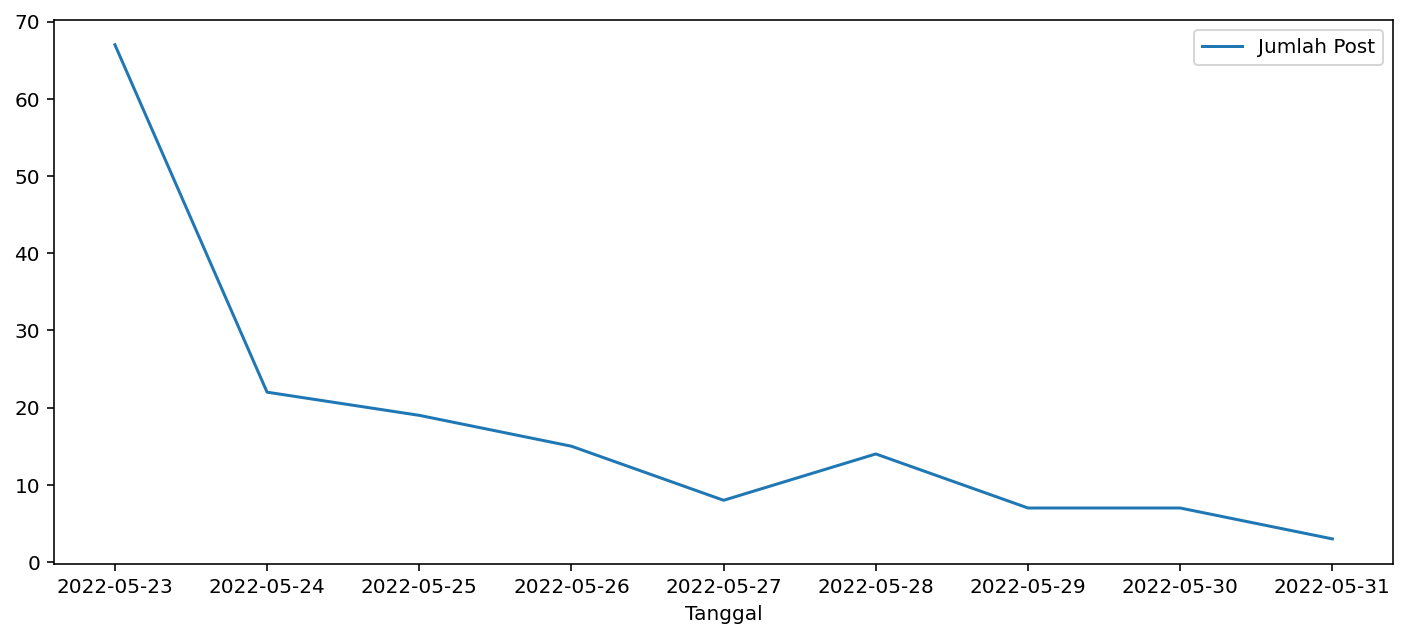

In [135]:
#Visualisasi data post/hari
TaPDF = pd.DataFrame(TaP, columns=["Tanggal","Jumlah Post"])
TaPDF.plot.line(x='Tanggal',y='Jumlah Post', figsize=(12,5))


In [147]:
#Pengolahan data jumlah post per harinya
listdate = global_warming_df['Tanggal Tweet'].dt.date.tolist()
days=0
PostADay = []
ListOfDate = []
for i in range(len(listdate)):
    if i==0:
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    elif current == listdate[i]:
        days+=1
    elif not current == listdate[i]:
        PostADay.append(days)
        days=0
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    if i==len(listdate)-1:
        PostADay.append(days)

TaP = {"Tanggal":[], "Jumlah Post":[]};
for i in range(len(PostADay)):
    TaP["Tanggal"].append(ListOfDate[i])
    TaP["Jumlah Post"].append(PostADay[i])

In [ ]:
#Visualisasi data post/hari
TaPDF = pd.DataFrame(TaP, columns=["Tanggal","Jumlah Post"])
TaPDF.plot.line(x='Tanggal',y='Jumlah Post', figsize=(12,5))

In [149]:
#Pengolahan data jumlah post per harinya
listdate = air_pollution_df['Tanggal Tweet'].dt.date.tolist()
days=0
PostADay = []
ListOfDate = []
for i in range(len(listdate)):
    if i==0:
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    elif current == listdate[i]:
        days+=1
    elif not current == listdate[i]:
        PostADay.append(days)
        days=0
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    if i==len(listdate)-1:
        PostADay.append(days)

TaP = {"Tanggal":[], "Jumlah Post":[]};
for i in range(len(PostADay)):
    TaP["Tanggal"].append(ListOfDate[i])
    TaP["Jumlah Post"].append(PostADay[i])

In [ ]:
#Visualisasi data post/hari
TaPDF = pd.DataFrame(TaP, columns=["Tanggal","Jumlah Post"])
TaPDF.plot.line(x='Tanggal',y='Jumlah Post', figsize=(12,5))

In [151]:
#Pengolahan data jumlah post per harinya
listdate = reforestation_df['Tanggal Tweet'].dt.date.tolist()
days=0
PostADay = []
ListOfDate = []
for i in range(len(listdate)):
    if i==0:
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    elif current == listdate[i]:
        days+=1
    elif not current == listdate[i]:
        PostADay.append(days)
        days=0
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    if i==len(listdate)-1:
        PostADay.append(days)

TaP = {"Tanggal":[], "Jumlah Post":[]};
for i in range(len(PostADay)):
    TaP["Tanggal"].append(ListOfDate[i])
    TaP["Jumlah Post"].append(PostADay[i])

<AxesSubplot:xlabel='Tanggal'>

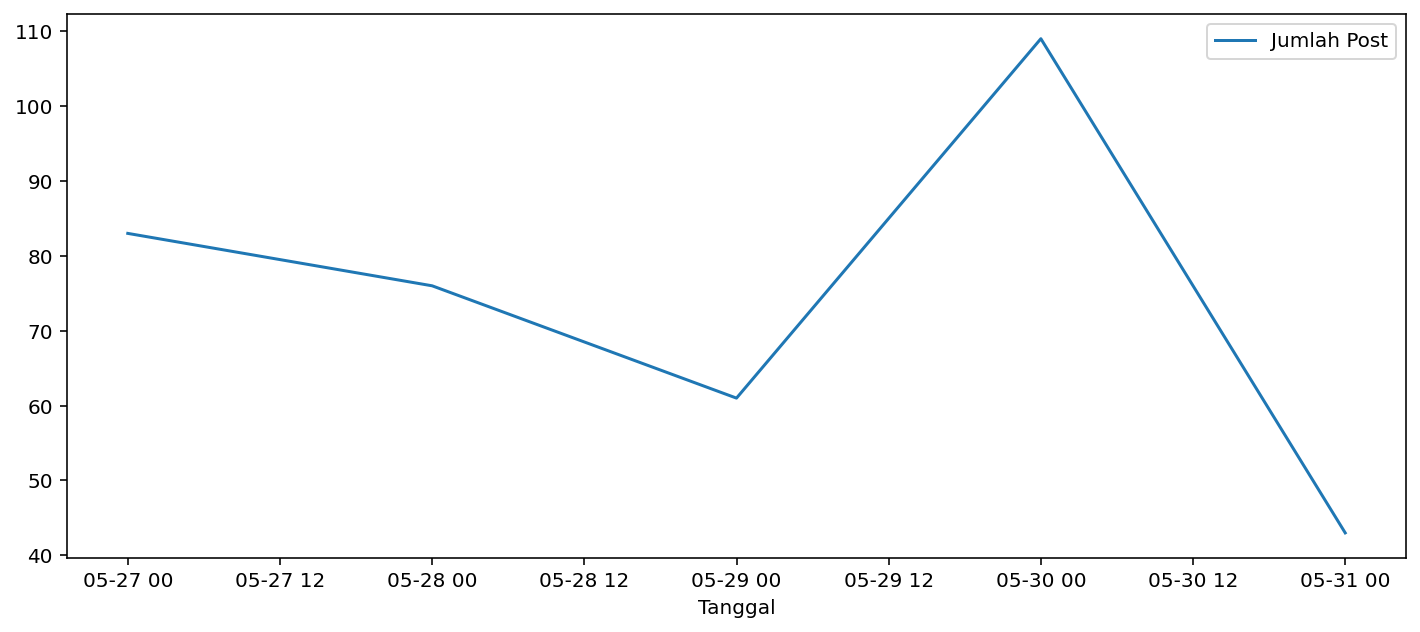

In [152]:
#Visualisasi data post/hari
TaPDF = pd.DataFrame(TaP, columns=["Tanggal","Jumlah Post"])
TaPDF.plot.line(x='Tanggal',y='Jumlah Post', figsize=(12,5))

In [142]:
#Pengolahan data jumlah post per harinya
listdate = deleting_email_df['Tanggal Tweet'].dt.date.tolist()
days=0
PostADay = []
ListOfDate = []
for i in range(len(listdate)):
    if i==0:
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    elif current == listdate[i]:
        days+=1
    elif not current == listdate[i]:
        PostADay.append(days)
        days=0
        current=listdate[i]
        ListOfDate.append(current)
        days+=1
    if i==len(listdate)-1:
        PostADay.append(days)

TaP = {"Tanggal":[], "Jumlah Post":[]};
for i in range(len(PostADay)):
    TaP["Tanggal"].append(ListOfDate[i])
    TaP["Jumlah Post"].append(PostADay[i])

<AxesSubplot:xlabel='Tanggal'>

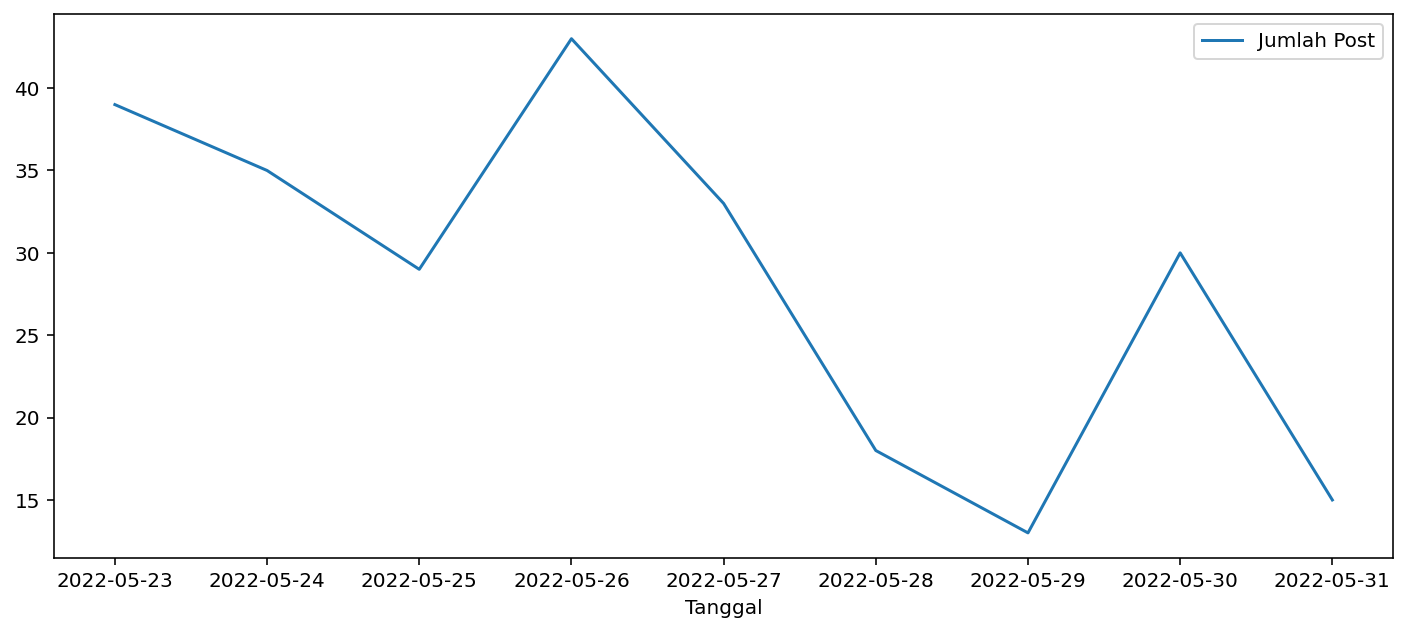

In [143]:
#Visualisasi data post/hari
TaPDF = pd.DataFrame(TaP, columns=["Tanggal","Jumlah Post"])
TaPDF.plot.line(x='Tanggal',y='Jumlah Post', figsize=(12,5))

In [144]:
scientist_protest_df.to_csv('scientist_protest_df.csv')
global_warming_df.to_csv('global_warming_df.csv')
air_pollution_df.to_csv('air_pollution_df.csv')
reforestation_df.to_csv('reforestation_df.csv')
deleting_email_df.to_csv('deleting_email_df.csv')

In [145]:
scientist_protest_df.compound_score_sentiment.value_counts()
global_warming_df.compound_score_sentiment.value_counts()
air_pollution_df.compound_score_sentiment.value_counts()
reforestation_df.compound_score_sentiment.value_counts()
deleting_email_df.compound_score_sentiment.value_counts()

Positive    143
Neutral      71
Negative     41
Name: compound_score_sentiment, dtype: int64

In [146]:
scientist_protest_df['Clean_text'].head()
global_warming_df['Clean_text'].head()
air_pollution_df['Clean_text'].head()
reforestation_df['Clean_text'].head()
deleting_email_df['Clean_text'].head()

0    fifti five pleas remov from thi email chain re...
1    yesterday watch elderli check email spend soli...
2    have close down email account chang account ov...
3    wonder storag free despit delet stuff also ema...
4    they have catch delet even just email they hav...
Name: Clean_text, dtype: object